### Augmentation with Keras

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [43]:
def apply_tranform(x, transform_parameters):
    x = keras.preprocessing.image.apply_affine_transform(x,
        transform_parameters.get('theta', 0),
        transform_parameters.get('tx', 0),
        transform_parameters.get('ty', 0),   
        transform_parameters.get('shear', 0), 
        transform_parameters.get('zx', 1), 
        transform_parameters.get('zy', 1),
        row_axis=0,                                                 
        col_axis = 1,
        channel_axis = 2,                                                        
        fill_mode = 'nearest',                                             
        cval = 0.0,                                                
        order = 1,                                                       
        )
    if transform_parameters.get('flip_horizontal', False):
        x = x[::-1, :, :]
    if transform_parameters.get('flip_vertical', False):
        x = x[:, ::-1, :]
    return x

In [8]:
def augment(img,
           rotation =0,
           height_shift=0,
           width_shift = 0,
           shear = 0, 
           zoom_x= 1,
           zoom_y= 1,
           flip_horizontal=0,
           flip_vertical = 0):
    x = np.array(img)
    transform_parameters = {
        'theta': rotation,
        'tx': height_shift,
        'ty': width_shift,
        'shear': shear,
        'zx': zoom_x,
        'zy': zoom_y,
        'flip_horizontal': flip_horizontal,
        'flip_vertical': flip_vertical,
    }
    xaug = apply_tranform(x, transform_parameters)
    imgaug = Image.fromarray(xaug)
    return imgaug

In [9]:
def show_augmentations(param, values, figsize=(20,6)):
    imgs = []

    for v in values:
        im = augment(tshirt, **{param: v})
        imgs.append(im) 

    plt.figure(figsize=figsize),

    n = len(values)

    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(np.array(imgs[i]))
        plt.title('%s=%s' %(param, values[i]))
        plt.axis('off')
    
    plt.show()

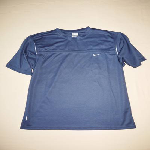

In [22]:
current_dir = !pwd
tshirt = Image.open(current_dir[0]+'/train/t-shirt/fb3f29fb-ae30-41a5-84cd-c1e3ccad0307.jpg')
tshirt= tshirt.resize((150, 150), resample=Image.NEAREST)
tshirt

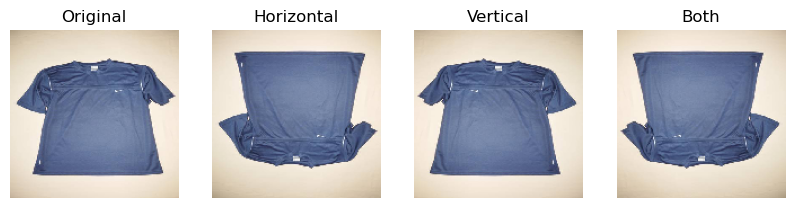

In [27]:
plt.figure(figsize =(10,3))

plt.subplot(1,4,1)
plt.imshow(np.array(tshirt))
plt.title('Original')
plt.axis("off")

plt.subplot(1,4,2)

img = augment(tshirt, flip_horizontal=1)
plt.imshow(np.array(img))
plt.title('Horizontal')
plt.axis("off")

plt.subplot(1,4,3)

img = augment(tshirt, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Vertical')
plt.axis("off")

plt.subplot(1,4,4)

img = augment(tshirt, flip_horizontal=1, flip_vertical=1)
plt.imshow(np.array(img))
plt.title('Both')
plt.axis("off")

plt.show()

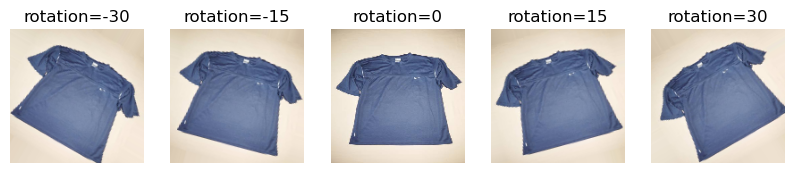

In [28]:
param = 'rotation'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

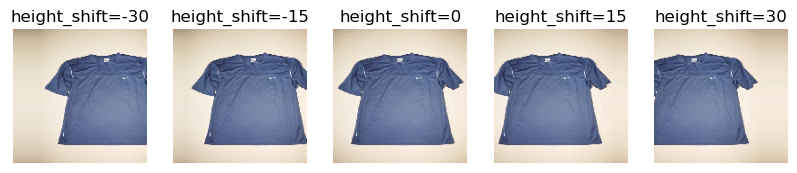

In [29]:
param = 'height_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

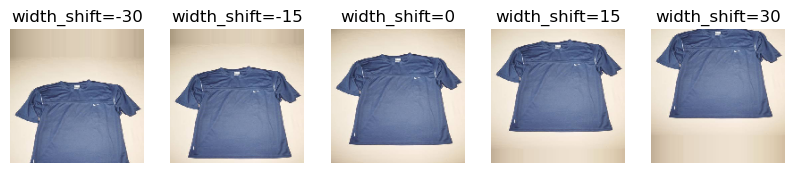

In [30]:
param = 'width_shift'
values = [-30, -15, 0, 15, 30]
show_augmentations(param, values, (10, 3))

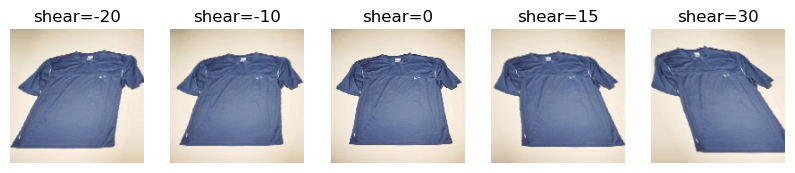

In [31]:
param = 'shear'
values = [-20, -10, 0, 15, 30]
show_augmentations(param, values, (10, 3))

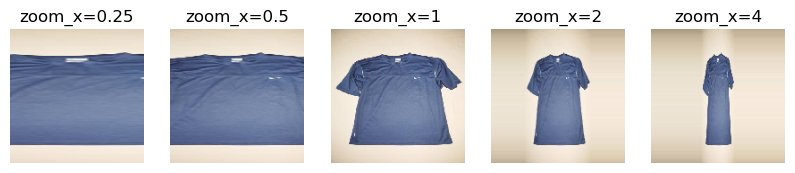

In [32]:
param = 'zoom_x'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

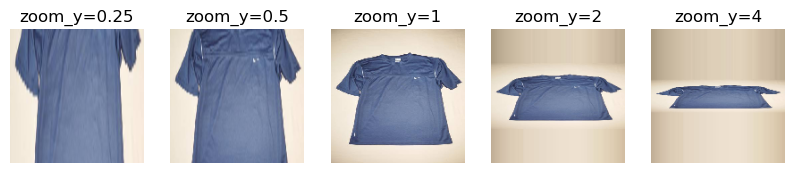

In [33]:
param = 'zoom_y'
values = [0.25, 0.5, 1, 2, 4]
show_augmentations(param, values, (10, 3))

In [36]:
vis_gen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 5.0,
    height_shift_range = 5.0,
    shear_range= 10.0,
    zoom_range = 0.1,
    horizontal_flip = True,
)

In [37]:
x = np.array(tshirt)

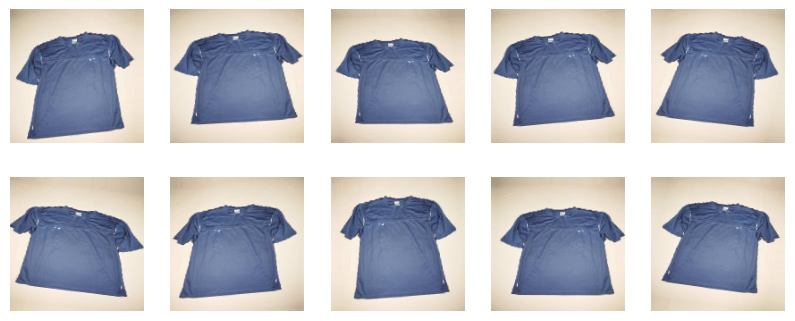

In [41]:
plt.figure(figsize=(10,4))

for i in range(10):
    t = vis_gen.get_random_transform((150,150))
    xaug = vis_gen.apply_transform(x, t)

    plt.subplot(2, 5, i +1)
    plt.imshow(xaug.astype('uint8'))
    plt.axis('off')

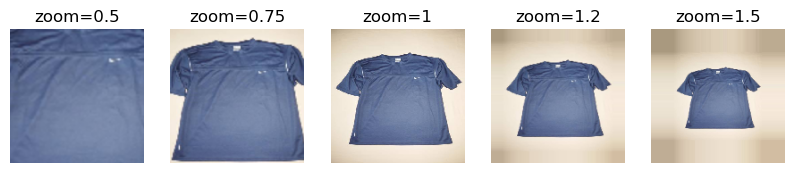

In [44]:
values = [0.5, 0.75, 1, 1.2, 1.5]

imgs = []

for v in values:
    im = augment(tshirt, zoom_x=v, zoom_y=v)
    imgs.append(im)
    
plt.figure(figsize =(10,4))

n = len(values)

for i in range(n):
    plt.subplot(2,n, i+1)
    plt.imshow(np.array(imgs[i]))
    plt.title('%s=%s' %('zoom', values[i]))
    plt.axis('off')

plt.show()